In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('List-of-best-selling-videogames.csv')

In [3]:
df.tail()

,Game,Developer,Publisher,Release date,Sales,Platform,Genre,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
425,Fitness Boxing,Imagineer,"JP: Imagineer, NA/PAL: Nintendo","December 20, 2018",1000000,Nintendo Switch,"Exergame, rhythm",NaN,NaN,NaN,NaN,NaN,NaN,NaN
426,Fitness Boxing 2: Rhythm and Exercise,Imagineer,"JP: Imagineer, NA/PAL: Nintendo","December 4, 2020",1000000,Nintendo Switch,"Exergame, rhythm",NaN,NaN,NaN,NaN,NaN,NaN,NaN
427,Shin Megami Tensei V,Atlus,"JP: Atlus, NA: Sega, PAL: Nintendo","November 11, 2021",1000000,Nintendo Switch,Role-playing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428,Story of Seasons: Pioneers of Olive Town,Marvelous,Xseed Games,"February 25, 2021",1000000,Nintendo Switch,"Simulation, role-playing",NaN,NaN,NaN,NaN,NaN,NaN,NaN
429,Thief Simulator,Noble Muffins,Forever Entertainment,"May 19, 2019",1000000,Nintendo Switch,Stealth,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Game          430 non-null    object 
 1   Developer     430 non-null    object 
 2   Publisher     430 non-null    object 
 3   Release date  430 non-null    object 
 4   Sales         430 non-null    int64  
 5   Platform      430 non-null    object 
 6   Genre         293 non-null    object 
 7   Unnamed: 7    0 non-null      float64
 8   Unnamed: 8    0 non-null      float64
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
dtypes: float64(7), int64(1), object(6)
memory usage: 47.2+ KB


In [5]:
df.drop(labels= ['Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13'],axis=1,inplace=True)

In [6]:
df.head()

,Game,Developer,Publisher,Release date,Sales,Platform,Genre
0,Super Mario World,Nintendo EAD,Nintendo,"November 21, 1990",20610000,Nintendo Entertainment System (NES),NaN
1,Super Mario All-Stars,Nintendo EAD,Nintendo,"July 14, 1993",10550000,Nintendo Entertainment System (NES),NaN
2,Donkey Kong Country,Rare,Nintendo,"November 21, 1994",9300000,Nintendo Entertainment System (NES),NaN
3,Super Mario Kart,Nintendo EAD,Nintendo,"August 27, 1992",8760000,Nintendo Entertainment System (NES),NaN
4,Street Fighter II: The World Warrior,Capcom,Capcom,"June 10, 1992",6300000,Nintendo Entertainment System (NES),NaN


In [7]:
df.drop(df[df.Genre.isnull()].index,inplace= True)

In [8]:
df.head()

,Game,Developer,Publisher,Release date,Sales,Platform,Genre
137,Super Smash Bros. Melee,HAL Laboratory,Nintendo,"November 21, 2001",7410000,GameCube,Fighting
138,Mario Kart: Double Dash,Nintendo EAD,Nintendo,"November 7, 2003",6960000,GameCube,Racing
139,Super Mario Sunshine,Nintendo EAD,Nintendo,"July 19, 2002",6280000,GameCube,Platformer
140,The Legend of Zelda: The Wind Waker,Nintendo EAD,Nintendo,"December 13, 2002",4430000,GameCube,Action-adventure
141,Luigi's Mansion,Nintendo EAD,Nintendo,"September 14, 2001",3330000,GameCube,Action-adventure


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 137 to 429
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Game          293 non-null    object
 1   Developer     293 non-null    object
 2   Publisher     293 non-null    object
 3   Release date  293 non-null    object
 4   Sales         293 non-null    int64 
 5   Platform      293 non-null    object
 6   Genre         293 non-null    object
dtypes: int64(1), object(6)
memory usage: 18.3+ KB


In [10]:
df.Genre.isnull().sum()

0

In [11]:
df.to_excel('Nintendo_games.xlsx')

In [12]:
df['Release Year']=  df['Release date']

In [13]:
df['Release date']

137     November 21, 2001
138      November 7, 2003
139         July 19, 2002
140     December 13, 2002
141    September 14, 2001
              ...        
425     December 20, 2018
426      December 4, 2020
427     November 11, 2021
428     February 25, 2021
429          May 19, 2019
Name: Release date, Length: 293, dtype: object

In [14]:
df_2= list(map(lambda x: x.split(','), df['Release date'].values))

In [15]:
Release_year=[]
for i in range(len(df_2)):
    Release_year.append(df_2[i][1])

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

In [16]:
df['Release_year']= Release_year

In [80]:
df['Release_year']= df['Release_year'].astype('int32')

In [18]:
 df.to_excel('Nintendo_games.xlsx')

# The year with the most games sold

In [74]:
df_sales= df.groupby(by='Release_year',as_index=False).sum()
df_sales.sort_values(by='Sales',axis=0,ascending=False,inplace=True)

<AxesSubplot:xlabel='Release_year', ylabel='Sales'>

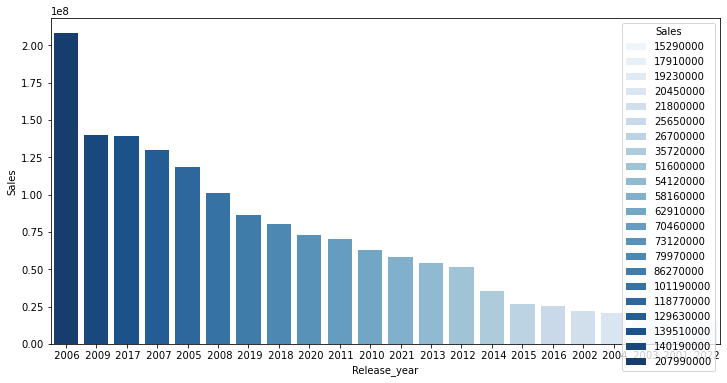

In [75]:
plt.figure(figsize=(12,6))
sns.barplot(x='Release_year',y='Sales',data=df_sales,palette='Blues',hue= 'Sales',dodge=False)

So, 2006 is the year with the most games sold. Then, what was the most sold game in 2006?

# Most Sold Game in 2006

In [83]:
df_2006 = df[df['Release_year']==2006]

In [85]:
df_2006.head()

,Game,Developer,Publisher,Release date,Sales,Platform,Genre,Release Year,Release_year
156,The Legend of Zelda: Twilight Princess,Nintendo EAD,Nintendo,"December 2, 2006",1430000,GameCube,Action-adventure,"December 2, 2006",2006
172,New Super Mario Bros.,Nintendo EAD (Group 4),Nintendo,"May 15, 2006",30800000,Nintendo DS,Platform,"May 15, 2006",2006
176,Pokémon Diamond and Pearl,Game Freak,The Pokémon Company,"September 28, 2006",17670000,Nintendo DS,Role-playing,"September 28, 2006",2006
193,English Training: Have Fun Improving Your Skills!,Nintendo SPD,Nintendo,"January 26, 2006",3910000,Nintendo DS,Puzzle,"January 26, 2006",2006
197,Yoshi's Island DS,Artoon,Nintendo,"November 13, 2006",3360000,Nintendo DS,Roguelike,"November 13, 2006",2006


In [88]:
df_2006.sort_values(by='Sales',ascending=False,inplace=True)

C:\Users\Hp\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<AxesSubplot:xlabel='Game', ylabel='Sales'>

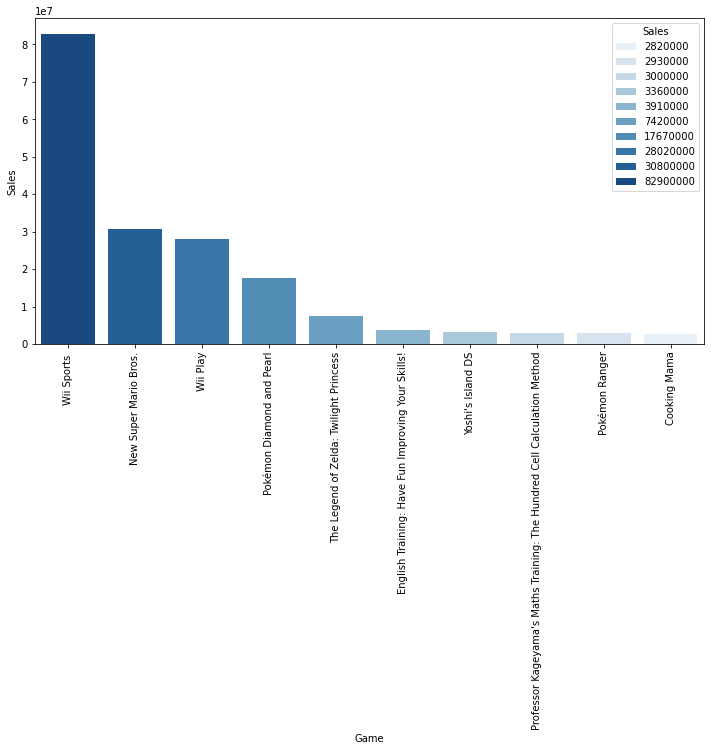

In [93]:
plt.figure(figsize=(12,6))
plt.xticks(rotation='vertical')
sns.barplot(x='Game',y='Sales',hue='Sales',palette='Blues',data=df_2006[:10],dodge=False)

Wii Sports is the most sold game in 2006 and the all time best seller Nintendo game.

In [101]:
df.drop('Release Year',inplace=True,axis=1)

In [103]:
df

,Game,Developer,Publisher,Release date,Sales,Platform,Genre,Release_year
137,Super Smash Bros. Melee,HAL Laboratory,Nintendo,"November 21, 2001",7410000,GameCube,Fighting,2001
138,Mario Kart: Double Dash,Nintendo EAD,Nintendo,"November 7, 2003",6960000,GameCube,Racing,2003
139,Super Mario Sunshine,Nintendo EAD,Nintendo,"July 19, 2002",6280000,GameCube,Platformer,2002
140,The Legend of Zelda: The Wind Waker,Nintendo EAD,Nintendo,"December 13, 2002",4430000,GameCube,Action-adventure,2002
141,Luigi's Mansion,Nintendo EAD,Nintendo,"September 14, 2001",3330000,GameCube,Action-adventure,2001
...,...,...,...,...,...,...,...,...
425,Fitness Boxing,Imagineer,"JP: Imagineer, NA/PAL: Nintendo","December 20, 2018",1000000,Nintendo Switch,"Exergame, rhythm",2018
426,Fitness Boxing 2: Rhythm and Exercise,Imagineer,"JP: Imagineer, NA/PAL: Nintendo","December 4, 2020",1000000,Nintendo Switch,"Exergame, rhythm",2020
427,Shin Megami Tensei V,Atlus,"JP: Atlus, NA: Sega, PAL: Nintendo","November 11, 2021",1000000,Nintendo Switch,Role-playing,2021
428,Story of Seasons: Pioneers of Olive Town,Marvelous,Xseed Games,"February 25, 2021",1000000,Nintendo Switch,"Simulation, role-playing",2021


# Most successful game developer

In [107]:
df_developer= df.groupby(by='Developer',as_index=False).sum()

In [121]:
df_developer.sort_values(by='Sales',ascending=False,inplace=True)

In [122]:
df_developer

,Developer,Sales,Release_year
76,Nintendo EPD,204360000,32294
33,Game Freak,171580000,26180
72,Nintendo EAD (Group 2),162990000,12042
71,Nintendo EAD (Group 1),105150000,10035
68,Nintendo EAD,97560000,36133
...,...,...,...
92,Pipeworks Software,1000000,2010
91,Pi Studios,1000000,2008
88,Noble Muffins,1000000,2019
55,Marvelous,1000000,2021


<AxesSubplot:xlabel='Developer', ylabel='Sales'>

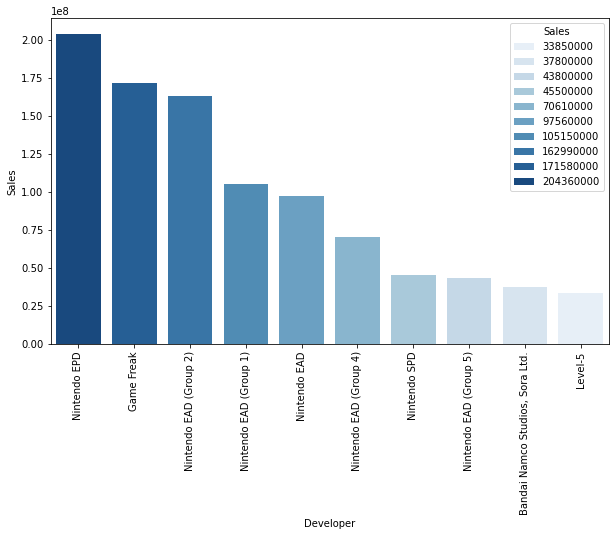

In [126]:
plt.figure(figsize=(10,6))
plt.xticks(rotation='vertical')
sns.barplot(x='Developer',y='Sales',data=df_developer[:10],hue='Sales',palette='Blues',dodge=False)

Nintendo EPD is the most successful developer dealing with nintendo company with 204,360,000 games sold, it is followed by "Game Freak" 171,580,000 games sold

# Best games developed by 'Game Freak'

In [128]:
df_GameFreak = df[df['Developer']=='Game Freak']

In [134]:
df_GameFreak = df_GameFreak.sort_values(by='Sales',ascending=False)
df_GameFreak

,Game,Developer,Publisher,Release date,Sales,Platform,Genre,Release_year
369,Pokémon Sword and Shield,Game Freak,"The Pokémon Company,Nintendo","November 15, 2019",24270000,Nintendo Switch,Role-playing,2019
176,Pokémon Diamond and Pearl,Game Freak,The Pokémon Company,"September 28, 2006",17670000,Nintendo DS,Role-playing,2006
309,Pokémon X and Y,Game Freak,"The Pokémon Company, Nintendo","October 12, 2013",16620000,Nintendo 3DS,Role-playing,2013
310,Pokémon Sun and Moon,Game Freak,"The Pokémon Company, Nintendo","November 18, 2016",16280000,Nintendo 3DS,Role-playing,2016
177,Pokémon Black and White,Game Freak,The Pokémon Company,"September 18, 2010",15640000,Nintendo DS,Role-playing,2010
373,"Pokémon: Let's Go, Pikachu! and Let's Go, Eevee!",Game Freak,"The Pokémon Company, Nintendo","November 16, 2018",14530000,Nintendo Switch,Role-playing,2018
311,Pokémon Omega Ruby and Alpha Sapphire,Game Freak,"The Pokémon Company, Nintendo","November 21, 2014",14500000,Nintendo 3DS,Role-playing,2014
179,Pokémon HeartGold and SoulSilver,Game Freak,The Pokémon Company,"September 12, 2009",12720000,Nintendo DS,Role-playing,2009
377,Pokémon Legends: Arceus,Game Freak,"The Pokémon Company, Nintendo","January 28, 2022",12640000,Nintendo Switch,Action role-playing,2022
316,Pokémon Ultra Sun and Ultra Moon,Game Freak,"The Pokémon Company, Nintendo","November 17, 2017",9090000,Nintendo 3DS,Role-playing,2017


<AxesSubplot:xlabel='Game', ylabel='Sales'>

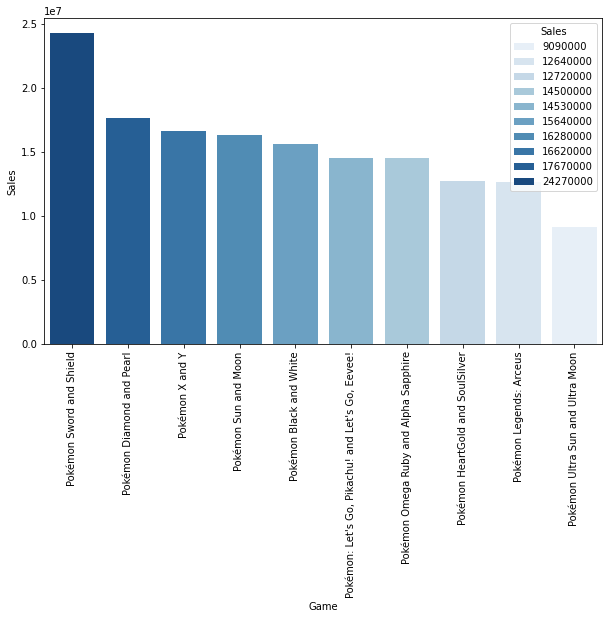

In [136]:
plt.figure(figsize=(10,6))
plt.xticks(rotation='vertical')
sns.barplot(x='Game',y='Sales',data=df_GameFreak[:10],hue='Sales',palette='Blues',dodge=False)

'Pokemon Sword and Shield' is Game Freak's most sold game 

# Best Racing game on Nintendo

In [140]:
len(set(df.Genre.values))

68

In [143]:
df_Racing= df[df['Genre']=='Racing']

In [147]:
df_Racing =df_Racing.sort_values(by='Sales',ascending=False)
df_Racing

,Game,Developer,Publisher,Release date,Sales,Platform,Genre,Release_year
246,Mario Kart Wii,Nintendo EAD (Group 1),Nintendo,"April 10, 2008",37380000,Wii,Racing,2008
174,Mario Kart DS,Nintendo EAD (Group 1),Nintendo,"November 14, 2005",23600000,Nintendo DS,Racing,2005
308,Mario Kart 7,"Nintendo EAD, Retro Studios",Nintendo,"December 1, 2011",18970000,Nintendo 3DS,Racing,2011
138,Mario Kart: Double Dash,Nintendo EAD,Nintendo,"November 7, 2003",6960000,GameCube,Racing,2003
155,F-Zero GX,Amusement Vision,Nintendo,"July 25, 2003",1500000,GameCube,Racing,2003
224,Dragon Quest Monsters: Joker,Tose,Square Enix,"December 28, 2006",1490000,Nintendo DS,Racing,2006
160,Kirby Air Ride,HAL Laboratory,Nintendo,"July 11, 2003",1350000,GameCube,Racing,2003


<AxesSubplot:xlabel='Game', ylabel='Sales'>

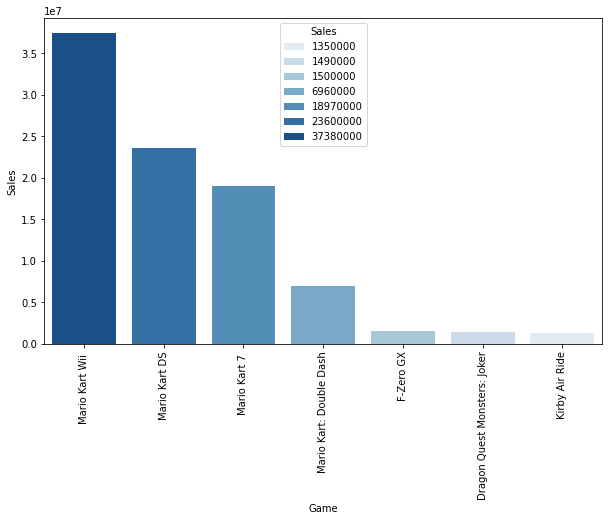

In [149]:
plt.figure(figsize=(10,6))
plt.xticks(rotation='vertical')
sns.barplot(x='Game',y='Sales',data=df_Racing,hue='Sales',palette='Blues',dodge= False)

'Mario Kart Wii' is the best racing game on nintendo. 